In [1]:
from collections import Counter
import math as mt
import json
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-3])
DATA_PATH = f'{ROOT_PATH}/AI_study/dataset/mcnicknames'

In [3]:
clear_name = lambda name: re.compile('[^a-zA-Z0-9_]').sub('', name)

In [4]:
df = pd.read_csv(f'{DATA_PATH}/nicknames.csv')
df = df.dropna()

In [5]:
nicknames = df['nicknames_s']
nicknames.head()

0        0
1       00
2      000
3     0000
4    00000
Name: nicknames_s, dtype: object

In [6]:
names  = ''.join([clear_name(name).lower() for name in nicknames])
length = [len(name.lower()) for name in nicknames]

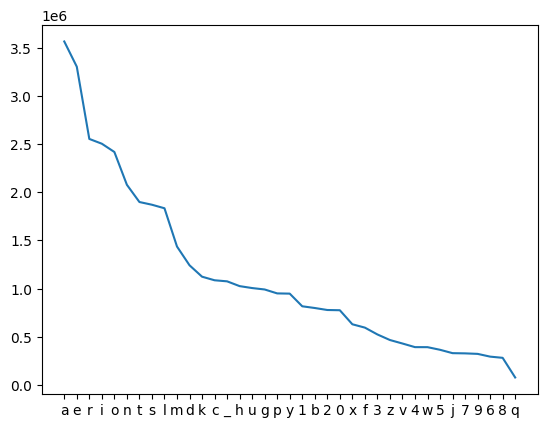

In [7]:
alpha_count = Counter(names)
alpha_count = dict(sorted(alpha_count.items(), key = lambda x : x[1], reverse = True))
plt.plot(alpha_count.keys(), alpha_count.values())

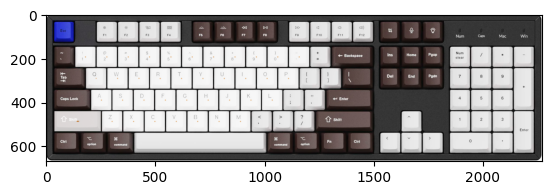

In [8]:
keyboard_image = cv2.imread(f'{DATA_PATH}/keyboard.png')
H, W           = keyboard_image.shape[:2]

plt.imshow(keyboard_image)

In [9]:
keycoords   = json.loads(open(f'{DATA_PATH}/buttons.json', 'r').read())
keycoords   = {key : list(map(int, value.split('-'))) for key, value in keycoords.items()}

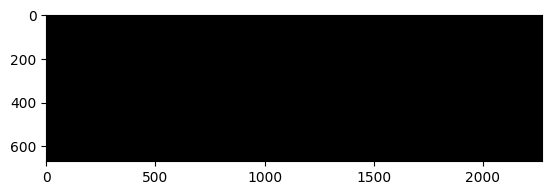

In [10]:
mask = np.zeros((H, W, 3), dtype = np.uint8)
plt.imshow(mask, cmap = 'gray')

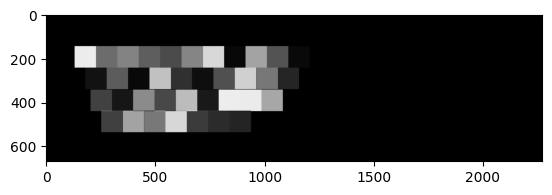

In [11]:
beta = 1e-2
for (alpha, count) in alpha_count.items():
    
    cx, cy = keycoords[alpha]
    count  = int(beta * count)
    
    mask[cy - 49: cy + 49, cx - 49 : cx + 49] += count
    
plt.imshow(mask, cmap = 'winter')

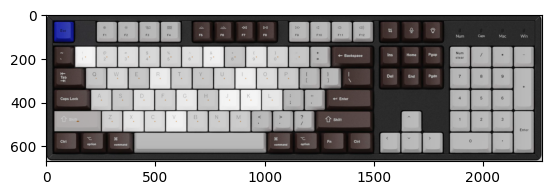

In [12]:
keyboard_image = cv2.addWeighted(keyboard_image, 0.8, mask, 0.2, 0)
plt.imshow(keyboard_image)

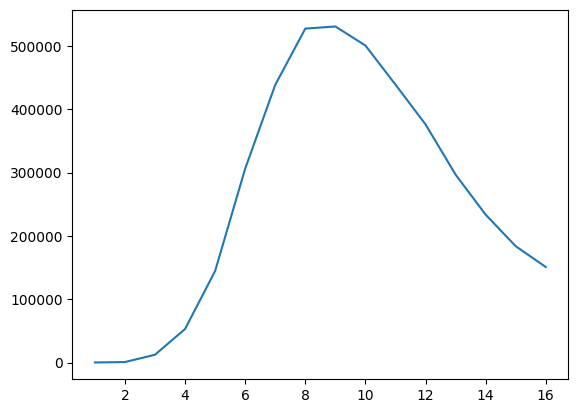

In [13]:
length_count = Counter(length)
plt.plot(length_count.keys(), length_count.values())

In [14]:
names    = sorted(list(set(names)))
name2int = dict((name, idx) for idx, name in enumerate(names))